In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

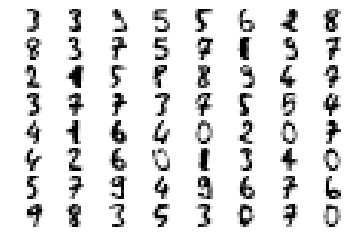

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.64684 stdev: 0.25189
Best fitness: 0.92641 - size: (2, 13) - species 6 - id 169
Average adjusted fitness: 0.542
Mean genetic distance 2.820, standard deviation 0.466
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.686 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.76562 stdev: 0.21432
Best fitness: 0.94682 - size: (2, 13) - species 1 - id 255
Average adjusted fitness: 0.714
Mean genetic distance 2.971, standard deviation 0.476
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.294 sec (6.990 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.82787 stdev: 0.16447
Best fitness: 0.96660 - size: (2, 13) - species 2 - id 534
Average adjusted fitness: 0.711
Mean genetic distance 2.984, standard deviation 0.467
Population of 205 members in 30 species
Total extincti

Total extinctions: 0
Generation time: 8.047 sec (7.575 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.86042 stdev: 0.17394
Best fitness: 0.99072 - size: (9, 25) - species 15 - id 3505
Average adjusted fitness: 0.758
Mean genetic distance 3.210, standard deviation 0.538
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 7.970 sec (7.677 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.86169 stdev: 0.17644
Best fitness: 0.99072 - size: (9, 25) - species 15 - id 3505
Average adjusted fitness: 0.778
Mean genetic distance 3.216, standard deviation 0.535
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 8.049 sec (7.788 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.85125 stdev: 0.18660
Best fitness: 0.99072 - size: (5, 19) - species 11 - id 3816
Average adjusted fitness: 0.751
Mean genetic distance 3.218, standard deviation 0.539
Populati

Population's average fitness: 0.85565 stdev: 0.19355
Best fitness: 0.99196 - size: (11, 28) - species 15 - id 6617
Average adjusted fitness: 0.754
Mean genetic distance 3.171, standard deviation 0.568
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 9.664 sec (9.672 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.85741 stdev: 0.20697
Best fitness: 0.99258 - size: (7, 22) - species 11 - id 7646
Average adjusted fitness: 0.756
Mean genetic distance 3.190, standard deviation 0.562
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 9.804 sec (9.693 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.88187 stdev: 0.15017
Best fitness: 0.99258 - size: (7, 22) - species 11 - id 7646
Average adjusted fitness: 0.657
Mean genetic distance 3.199, standard deviation 0.565
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.871 sec (9.716 average)

 *****

Population's average fitness: 0.88763 stdev: 0.17067
Best fitness: 0.99443 - size: (10, 30) - species 49 - id 11427
Average adjusted fitness: 0.792
Mean genetic distance 3.230, standard deviation 0.620
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 10.512 sec (10.468 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.86705 stdev: 0.18605
Best fitness: 0.99443 - size: (10, 30) - species 49 - id 11427
Average adjusted fitness: 0.754
Mean genetic distance 3.249, standard deviation 0.609
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 11.297 sec (10.536 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.90256 stdev: 0.14281
Best fitness: 0.99443 - size: (10, 30) - species 49 - id 11427
Average adjusted fitness: 0.800
Mean genetic distance 3.243, standard deviation 0.630
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 10.814 sec (10.558 avera

Population's average fitness: 0.90108 stdev: 0.14610
Best fitness: 0.99443 - size: (10, 27) - species 63 - id 14894
Average adjusted fitness: 0.792
Mean genetic distance 3.137, standard deviation 0.640
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.993 sec (10.969 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.90182 stdev: 0.15461
Best fitness: 0.99443 - size: (10, 27) - species 63 - id 14894
Average adjusted fitness: 0.799
Mean genetic distance 3.146, standard deviation 0.644
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 13.371 sec (11.232 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.90323 stdev: 0.12538
Best fitness: 0.99443 - size: (10, 27) - species 63 - id 14894
Average adjusted fitness: 0.796
Mean genetic distance 3.092, standard deviation 0.651
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 11.020 sec (11.230 avera

Population's average fitness: 0.87459 stdev: 0.19833
Best fitness: 0.99505 - size: (12, 32) - species 76 - id 19686
Average adjusted fitness: 0.774
Mean genetic distance 3.120, standard deviation 0.509
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.919 sec (11.478 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.89501 stdev: 0.15704
Best fitness: 0.99505 - size: (12, 32) - species 76 - id 19686
Average adjusted fitness: 0.747
Mean genetic distance 3.119, standard deviation 0.513
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 11.637 sec (11.500 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.88670 stdev: 0.18013
Best fitness: 0.99505 - size: (12, 32) - species 76 - id 19686
Average adjusted fitness: 0.788
Mean genetic distance 3.095, standard deviation 0.531
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.745 sec (11.532 ave

Population's average fitness: 0.89092 stdev: 0.16426
Best fitness: 0.99567 - size: (13, 33) - species 88 - id 22298
Average adjusted fitness: 0.724
Mean genetic distance 3.030, standard deviation 0.588
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 14.905 sec (12.904 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.90074 stdev: 0.15127
Best fitness: 0.99567 - size: (13, 33) - species 88 - id 22298
Average adjusted fitness: 0.676
Mean genetic distance 3.001, standard deviation 0.591
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 13.688 sec (13.045 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.90867 stdev: 0.15809
Best fitness: 0.99567 - size: (13, 33) - species 88 - id 22298
Average adjusted fitness: 0.798
Mean genetic distance 2.939, standard deviation 0.617
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 14.655 sec (13.273 ave

Mean genetic distance 3.121, standard deviation 0.529
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.368 sec (7.121 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.84527 stdev: 0.14050
Best fitness: 0.91713 - size: (5, 20) - species 14 - id 1093
Average adjusted fitness: 0.738
Mean genetic distance 3.145, standard deviation 0.526
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.557 sec (7.208 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.84913 stdev: 0.13498
Best fitness: 0.91713 - size: (5, 20) - species 14 - id 1093
Average adjusted fitness: 0.747
Mean genetic distance 3.124, standard deviation 0.524
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.740 sec (7.290 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.84757 stdev: 0.14183
Best fitness: 0.91713 - size: (5, 20) - species 14 - id 1093


Mean genetic distance 3.282, standard deviation 0.592
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 8.814 sec (8.519 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.82775 stdev: 0.17763
Best fitness: 0.92641 - size: (6, 23) - species 38 - id 5202
Average adjusted fitness: 0.701
Mean genetic distance 3.273, standard deviation 0.586
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 8.947 sec (8.596 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.83615 stdev: 0.15172
Best fitness: 0.92703 - size: (5, 20) - species 40 - id 6636
Average adjusted fitness: 0.651
Mean genetic distance 3.242, standard deviation 0.577
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 9.078 sec (8.671 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.84382 stdev: 0.14080
Best fitness: 0.92703 - size: (5, 20) - species 40 - id 6636


Mean genetic distance 3.253, standard deviation 0.620
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.849 sec (10.182 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.84661 stdev: 0.14459
Best fitness: 0.93197 - size: (13, 37) - species 49 - id 10420
Average adjusted fitness: 0.746
Mean genetic distance 3.280, standard deviation 0.606
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.858 sec (10.374 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.82924 stdev: 0.17441
Best fitness: 0.93506 - size: (10, 32) - species 56 - id 10628
Average adjusted fitness: 0.701
Mean genetic distance 3.280, standard deviation 0.633
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 11.020 sec (10.504 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.82759 stdev: 0.17373
Best fitness: 0.93506 - size: (10, 32) - species 56

Population's average fitness: 0.85328 stdev: 0.15048
Best fitness: 0.94372 - size: (11, 32) - species 56 - id 12563
Average adjusted fitness: 0.754
Mean genetic distance 3.238, standard deviation 0.618
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.643 sec (11.410 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.82885 stdev: 0.18725
Best fitness: 0.94372 - size: (11, 32) - species 56 - id 12563
Average adjusted fitness: 0.728
Mean genetic distance 3.199, standard deviation 0.623
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 11.475 sec (11.399 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.82069 stdev: 0.19056
Best fitness: 0.94372 - size: (11, 32) - species 56 - id 12563
Average adjusted fitness: 0.721
Mean genetic distance 3.155, standard deviation 0.628
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.286 sec (11.385 avera

Population's average fitness: 0.84179 stdev: 0.16770
Best fitness: 0.94682 - size: (14, 38) - species 56 - id 16180
Average adjusted fitness: 0.743
Mean genetic distance 2.869, standard deviation 0.492
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.968 sec (12.788 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.86736 stdev: 0.12154
Best fitness: 0.94682 - size: (14, 38) - species 56 - id 16180
Average adjusted fitness: 0.627
Mean genetic distance 2.864, standard deviation 0.490
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 12.833 sec (12.819 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.86511 stdev: 0.13454
Best fitness: 0.94682 - size: (14, 38) - species 56 - id 16180
Average adjusted fitness: 0.764
Mean genetic distance 2.858, standard deviation 0.465
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 13.198 sec (12.924 ave

Population's average fitness: 0.85566 stdev: 0.14380
Best fitness: 0.94743 - size: (12, 37) - species 67 - id 20137
Average adjusted fitness: 0.737
Mean genetic distance 2.968, standard deviation 0.529
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 18.665 sec (14.773 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.86336 stdev: 0.11565
Best fitness: 0.94743 - size: (12, 37) - species 67 - id 20137
Average adjusted fitness: 0.680
Mean genetic distance 2.961, standard deviation 0.519
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 17.035 sec (15.116 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.82793 stdev: 0.16731
Best fitness: 0.94743 - size: (12, 37) - species 67 - id 20137
Average adjusted fitness: 0.725
Mean genetic distance 2.970, standard deviation 0.527
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 15.143 sec (15.305 ave


 ****** Running generation 12 ****** 

Population's average fitness: 0.84317 stdev: 0.15165
Best fitness: 0.95857 - size: (5, 19) - species 22 - id 1882
Average adjusted fitness: 0.735
Mean genetic distance 3.127, standard deviation 0.544
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.930 sec (6.664 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.85303 stdev: 0.12800
Best fitness: 0.95857 - size: (5, 19) - species 22 - id 1882
Average adjusted fitness: 0.738
Mean genetic distance 3.133, standard deviation 0.549
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.099 sec (6.779 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.85564 stdev: 0.12964
Best fitness: 0.95857 - size: (5, 19) - species 22 - id 1882
Average adjusted fitness: 0.730
Mean genetic distance 3.136, standard deviation 0.549
Population of 199 members in 30 species
Total extinctions: 0
Generation 

Total extinctions: 0
Generation time: 8.468 sec (8.085 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.81499 stdev: 0.19088
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.716
Mean genetic distance 3.131, standard deviation 0.587
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 8.500 sec (8.158 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.81276 stdev: 0.19392
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.713
Mean genetic distance 3.155, standard deviation 0.594
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 8.653 sec (8.238 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.82243 stdev: 0.17858
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.722
Mean genetic distance 3.164, standard deviation 0.593
Populati

Population's average fitness: 0.84699 stdev: 0.15810
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.742
Mean genetic distance 3.200, standard deviation 0.585
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 9.583 sec (9.588 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.84327 stdev: 0.15504
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.743
Mean genetic distance 3.199, standard deviation 0.591
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.456 sec (9.598 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.84505 stdev: 0.14071
Best fitness: 0.96228 - size: (7, 24) - species 22 - id 4913
Average adjusted fitness: 0.623
Mean genetic distance 3.205, standard deviation 0.610
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 9.029 sec (9.541 average)

 ******

Population's average fitness: 0.85180 stdev: 0.16868
Best fitness: 0.96846 - size: (10, 28) - species 22 - id 12877
Average adjusted fitness: 0.753
Mean genetic distance 3.265, standard deviation 0.647
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 12.516 sec (11.140 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.85743 stdev: 0.14576
Best fitness: 0.96846 - size: (10, 28) - species 22 - id 12877
Average adjusted fitness: 0.745
Mean genetic distance 3.271, standard deviation 0.633
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 12.189 sec (11.225 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.84921 stdev: 0.16211
Best fitness: 0.96846 - size: (10, 28) - species 22 - id 12877
Average adjusted fitness: 0.757
Mean genetic distance 3.247, standard deviation 0.631
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.403 sec (11.362 avera

Population's average fitness: 0.86619 stdev: 0.13027
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.772
Mean genetic distance 3.081, standard deviation 0.568
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.553 sec (12.891 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.85117 stdev: 0.15146
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.742
Mean genetic distance 3.088, standard deviation 0.562
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.111 sec (13.076 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.84426 stdev: 0.17563
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.750
Mean genetic distance 3.127, standard deviation 0.574
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.429 sec (13.086 ave

Population's average fitness: 0.87225 stdev: 0.13754
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.739
Mean genetic distance 2.963, standard deviation 0.587
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 15.194 sec (13.647 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.86125 stdev: 0.16954
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.762
Mean genetic distance 2.971, standard deviation 0.562
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.998 sec (13.717 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.85800 stdev: 0.16996
Best fitness: 0.97774 - size: (15, 38) - species 22 - id 17179
Average adjusted fitness: 0.739
Mean genetic distance 2.920, standard deviation 0.551
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 14.304 sec (13.826 ave

Population's average fitness: 0.85365 stdev: 0.13154
Best fitness: 0.95857 - size: (5, 17) - species 25 - id 999
Average adjusted fitness: 0.737
Mean genetic distance 2.987, standard deviation 0.516
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.403 sec (6.342 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.84974 stdev: 0.13388
Best fitness: 0.95857 - size: (5, 17) - species 25 - id 999
Average adjusted fitness: 0.743
Mean genetic distance 2.954, standard deviation 0.505
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.097 sec (6.437 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.85269 stdev: 0.12491
Best fitness: 0.95857 - size: (5, 17) - species 25 - id 999
Average adjusted fitness: 0.749
Mean genetic distance 2.966, standard deviation 0.517
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 6.558 sec (6.450 average)

 ****** Runn

Population's average fitness: 0.82925 stdev: 0.19490
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.718
Mean genetic distance 3.207, standard deviation 0.519
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 8.582 sec (8.875 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.85954 stdev: 0.14284
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.758
Mean genetic distance 3.235, standard deviation 0.530
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 10.720 sec (9.222 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.85570 stdev: 0.14347
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.751
Mean genetic distance 3.225, standard deviation 0.524
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 9.966 sec (9.473 average)

 **

Mean genetic distance 3.178, standard deviation 0.567
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.213 sec (9.857 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.85136 stdev: 0.15779
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.752
Mean genetic distance 3.177, standard deviation 0.561
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 11.061 sec (10.015 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.85218 stdev: 0.16016
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.732
Mean genetic distance 3.180, standard deviation 0.566
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.319 sec (10.228 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.84155 stdev: 0.18060
Best fitness: 0.96537 - size: (11, 31) - species 25 - 

Mean genetic distance 3.141, standard deviation 0.573
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 11.485 sec (11.289 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.83502 stdev: 0.19412
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.732
Mean genetic distance 3.153, standard deviation 0.591
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 11.435 sec (11.334 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.84054 stdev: 0.17787
Best fitness: 0.96537 - size: (11, 31) - species 25 - id 4241
Average adjusted fitness: 0.732
Mean genetic distance 3.155, standard deviation 0.565
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.355 sec (11.324 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.84346 stdev: 0.16569
Best fitness: 0.96537 - size: (11, 31) - species 25 -

Population's average fitness: 0.86053 stdev: 0.14307
Best fitness: 0.97279 - size: (21, 42) - species 53 - id 16094
Average adjusted fitness: 0.757
Mean genetic distance 3.201, standard deviation 0.594
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 12.299 sec (12.450 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.85579 stdev: 0.13782
Best fitness: 0.97279 - size: (21, 42) - species 53 - id 16094
Average adjusted fitness: 0.756
Mean genetic distance 3.208, standard deviation 0.637
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 12.643 sec (12.497 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.81205 stdev: 0.20697
Best fitness: 0.97279 - size: (21, 42) - species 53 - id 16094
Average adjusted fitness: 0.709
Mean genetic distance 3.221, standard deviation 0.603
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 11.907 sec (12.460 ave

Population's average fitness: 0.84083 stdev: 0.18075
Best fitness: 0.97403 - size: (21, 43) - species 53 - id 17667
Average adjusted fitness: 0.717
Mean genetic distance 3.083, standard deviation 0.610
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 11.755 sec (12.994 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.85478 stdev: 0.16351
Best fitness: 0.97526 - size: (23, 48) - species 53 - id 21448
Average adjusted fitness: 0.739
Mean genetic distance 3.087, standard deviation 0.653
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 11.964 sec (13.074 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.86483 stdev: 0.16322
Best fitness: 0.97526 - size: (23, 48) - species 72 - id 21448
Average adjusted fitness: 0.765
Mean genetic distance 3.106, standard deviation 0.686
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 12.967 sec (13.157 ave

Population's average fitness: 0.57240 stdev: 0.27401
Best fitness: 0.90229 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.391
Mean genetic distance 2.792, standard deviation 0.446
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 5.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.76738 stdev: 0.20855
Best fitness: 0.91156 - size: (3, 15) - species 5 - id 323
Average adjusted fitness: 0.632
Mean genetic distance 2.900, standard deviation 0.504
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 5.334 sec (5.174 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77914 stdev: 0.21281
Best fitness: 0.92146 - size: (2, 15) - species 10 - id 398
Average adjusted fitness: 0.666
Mean genetic distance 2.960, standard deviation 0.518
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 5.737 sec (5.362 average)

 ****** Running generation 3 **

Population's average fitness: 0.86470 stdev: 0.13827
Best fitness: 0.97032 - size: (12, 37) - species 7 - id 3582
Average adjusted fitness: 0.766
Mean genetic distance 3.216, standard deviation 0.495
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.225 sec (8.356 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.86623 stdev: 0.12229
Best fitness: 0.97341 - size: (7, 19) - species 24 - id 3675
Average adjusted fitness: 0.632
Mean genetic distance 3.276, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.023 sec (8.387 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.85504 stdev: 0.16679
Best fitness: 0.97341 - size: (7, 19) - species 24 - id 3675
Average adjusted fitness: 0.749
Mean genetic distance 3.289, standard deviation 0.480
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.869 sec (8.593 average)

 ******

Total extinctions: 0
Generation time: 9.360 sec (8.919 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.87768 stdev: 0.10844
Best fitness: 0.97341 - size: (16, 46) - species 7 - id 7059
Average adjusted fitness: 0.585
Mean genetic distance 3.284, standard deviation 0.605
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.187 sec (8.956 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.86993 stdev: 0.13189
Best fitness: 0.97464 - size: (8, 22) - species 24 - id 7589
Average adjusted fitness: 0.711
Mean genetic distance 3.288, standard deviation 0.589
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.360 sec (9.013 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.87091 stdev: 0.14145
Best fitness: 0.97464 - size: (8, 22) - species 24 - id 7589
Average adjusted fitness: 0.724
Mean genetic distance 3.279, standard deviation 0.583
Populati

Population's average fitness: 0.86593 stdev: 0.15464
Best fitness: 0.97774 - size: (17, 48) - species 7 - id 9384
Average adjusted fitness: 0.759
Mean genetic distance 3.112, standard deviation 0.634
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 9.732 sec (10.420 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.87871 stdev: 0.14103
Best fitness: 0.97774 - size: (17, 48) - species 7 - id 9384
Average adjusted fitness: 0.777
Mean genetic distance 3.128, standard deviation 0.615
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 9.875 sec (10.243 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.89033 stdev: 0.10902
Best fitness: 0.97774 - size: (17, 48) - species 7 - id 9384
Average adjusted fitness: 0.630
Mean genetic distance 3.130, standard deviation 0.636
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.675 sec (10.240 average)

 ***

Population's average fitness: 0.88698 stdev: 0.12618
Best fitness: 0.97774 - size: (9, 24) - species 59 - id 15330
Average adjusted fitness: 0.764
Mean genetic distance 2.928, standard deviation 0.565
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 10.613 sec (10.831 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.89490 stdev: 0.11695
Best fitness: 0.97774 - size: (9, 24) - species 61 - id 15330
Average adjusted fitness: 0.797
Mean genetic distance 2.942, standard deviation 0.556
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 11.578 sec (10.910 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.88472 stdev: 0.13157
Best fitness: 0.97835 - size: (11, 28) - species 55 - id 15891
Average adjusted fitness: 0.799
Mean genetic distance 2.972, standard deviation 0.543
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 10.851 sec (10.884 average

Population's average fitness: 0.88146 stdev: 0.12876
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.784
Mean genetic distance 2.922, standard deviation 0.637
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 11.853 sec (11.645 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.89907 stdev: 0.10637
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.802
Mean genetic distance 2.970, standard deviation 0.589
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 13.591 sec (11.916 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.87514 stdev: 0.15331
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.768
Mean genetic distance 2.938, standard deviation 0.595
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.864 sec (12.113 aver

Population's average fitness: 0.86399 stdev: 0.15357
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.763
Mean genetic distance 2.926, standard deviation 0.592
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 16.051 sec (15.469 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.87245 stdev: 0.14730
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.774
Mean genetic distance 2.934, standard deviation 0.601
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 16.075 sec (15.760 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.86503 stdev: 0.16187
Best fitness: 0.98145 - size: (17, 45) - species 68 - id 19890
Average adjusted fitness: 0.763
Mean genetic distance 2.920, standard deviation 0.584
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 17.160 sec (16.087 ave


Population's average fitness: 0.82505 stdev: 0.18382
Best fitness: 0.96660 - size: (4, 19) - species 7 - id 2927
Average adjusted fitness: 0.722
Mean genetic distance 3.211, standard deviation 0.555
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 8.431 sec (7.963 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.84017 stdev: 0.16110
Best fitness: 0.96660 - size: (4, 19) - species 7 - id 2927
Average adjusted fitness: 0.737
Mean genetic distance 3.223, standard deviation 0.545
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 8.202 sec (8.068 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.83172 stdev: 0.17117
Best fitness: 0.96660 - size: (4, 19) - species 7 - id 2927
Average adjusted fitness: 0.750
Mean genetic distance 3.200, standard deviation 0.543
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.642 sec (8.299 average)

 ****** R

Population's average fitness: 0.82524 stdev: 0.17980
Best fitness: 0.96784 - size: (4, 20) - species 7 - id 4022
Average adjusted fitness: 0.699
Mean genetic distance 3.220, standard deviation 0.560
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 10.778 sec (10.351 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.82751 stdev: 0.17557
Best fitness: 0.96908 - size: (4, 20) - species 7 - id 7044
Average adjusted fitness: 0.706
Mean genetic distance 3.218, standard deviation 0.559
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 10.303 sec (10.439 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.82655 stdev: 0.18816
Best fitness: 0.96908 - size: (4, 20) - species 7 - id 7044
Average adjusted fitness: 0.705
Mean genetic distance 3.231, standard deviation 0.576
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 9.809 sec (10.447 average)

 ****

Population's average fitness: 0.83009 stdev: 0.16451
Best fitness: 0.97588 - size: (15, 38) - species 44 - id 10445
Average adjusted fitness: 0.698
Mean genetic distance 3.092, standard deviation 0.615
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 10.518 sec (10.619 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.84642 stdev: 0.14405
Best fitness: 0.97588 - size: (15, 38) - species 44 - id 10445
Average adjusted fitness: 0.750
Mean genetic distance 3.111, standard deviation 0.597
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 10.681 sec (10.644 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.83724 stdev: 0.16537
Best fitness: 0.97588 - size: (15, 38) - species 44 - id 10445
Average adjusted fitness: 0.738
Mean genetic distance 3.091, standard deviation 0.614
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 10.971 sec (10.701 avera

Population's average fitness: 0.84862 stdev: 0.16531
Best fitness: 0.97774 - size: (17, 44) - species 14 - id 14179
Average adjusted fitness: 0.750
Mean genetic distance 3.271, standard deviation 0.572
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 13.158 sec (11.581 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.84582 stdev: 0.16918
Best fitness: 0.97774 - size: (17, 44) - species 14 - id 14179
Average adjusted fitness: 0.743
Mean genetic distance 3.262, standard deviation 0.580
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 12.925 sec (11.759 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.83619 stdev: 0.18546
Best fitness: 0.97774 - size: (17, 44) - species 14 - id 14179
Average adjusted fitness: 0.741
Mean genetic distance 3.220, standard deviation 0.586
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 12.587 sec (11.929 avera

Population's average fitness: 0.83510 stdev: 0.17762
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.747
Mean genetic distance 3.223, standard deviation 0.636
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.104 sec (15.864 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.82113 stdev: 0.18676
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.718
Mean genetic distance 3.232, standard deviation 0.629
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.771 sec (15.902 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.84216 stdev: 0.16074
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.743
Mean genetic distance 3.244, standard deviation 0.606
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.525 sec (16.037 ave

Population's average fitness: 0.84409 stdev: 0.16648
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.744
Mean genetic distance 3.313, standard deviation 0.651
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 17.121 sec (17.178 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.84604 stdev: 0.16161
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.744
Mean genetic distance 3.309, standard deviation 0.649
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 17.004 sec (17.281 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.83924 stdev: 0.17771
Best fitness: 0.98578 - size: (17, 46) - species 61 - id 18675
Average adjusted fitness: 0.735
Mean genetic distance 3.312, standard deviation 0.643
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 16.668 sec (17.030 ave

Population's average fitness: 0.84409 stdev: 0.15805
Best fitness: 0.96104 - size: (3, 15) - species 5 - id 1599
Average adjusted fitness: 0.710
Mean genetic distance 3.148, standard deviation 0.495
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 7.527 sec (7.255 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.83240 stdev: 0.17607
Best fitness: 0.96104 - size: (3, 15) - species 5 - id 1599
Average adjusted fitness: 0.725
Mean genetic distance 3.154, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.081 sec (7.256 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.85944 stdev: 0.13362
Best fitness: 0.96104 - size: (3, 15) - species 5 - id 1599
Average adjusted fitness: 0.731
Mean genetic distance 3.152, standard deviation 0.488
Population of 187 members in 37 species
Total extinctions: 0
Generation time: 7.530 sec (7.297 average)

 ****** Ru

Mean genetic distance 3.239, standard deviation 0.540
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 10.616 sec (9.358 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.83512 stdev: 0.18986
Best fitness: 0.97279 - size: (5, 17) - species 34 - id 4348
Average adjusted fitness: 0.734
Mean genetic distance 3.208, standard deviation 0.549
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 9.628 sec (9.400 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.85272 stdev: 0.15394
Best fitness: 0.97279 - size: (5, 17) - species 34 - id 4348
Average adjusted fitness: 0.720
Mean genetic distance 3.189, standard deviation 0.550
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.653 sec (9.475 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.84886 stdev: 0.16377
Best fitness: 0.97279 - size: (5, 17) - species 34 - id 4348

Mean genetic distance 3.201, standard deviation 0.586
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 9.321 sec (9.821 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.84666 stdev: 0.17568
Best fitness: 0.97650 - size: (6, 19) - species 34 - id 6149
Average adjusted fitness: 0.751
Mean genetic distance 3.160, standard deviation 0.599
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.669 sec (9.890 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.84696 stdev: 0.16245
Best fitness: 0.97650 - size: (6, 19) - species 34 - id 6149
Average adjusted fitness: 0.749
Mean genetic distance 3.144, standard deviation 0.613
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 9.202 sec (9.876 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.85887 stdev: 0.15946
Best fitness: 0.97650 - size: (6, 19) - species 34 - id 6149


Mean genetic distance 3.162, standard deviation 0.584
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.965 sec (10.299 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.85938 stdev: 0.14601
Best fitness: 0.97897 - size: (10, 31) - species 55 - id 12272
Average adjusted fitness: 0.723
Mean genetic distance 3.186, standard deviation 0.589
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.531 sec (10.456 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.85248 stdev: 0.15919
Best fitness: 0.97897 - size: (10, 31) - species 55 - id 12272
Average adjusted fitness: 0.750
Mean genetic distance 3.194, standard deviation 0.579
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.826 sec (10.543 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.86375 stdev: 0.14908
Best fitness: 0.97897 - size: (10, 31) - species 55

Population's average fitness: 0.86097 stdev: 0.14232
Best fitness: 0.98021 - size: (11, 33) - species 55 - id 14962
Average adjusted fitness: 0.760
Mean genetic distance 3.147, standard deviation 0.609
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 12.084 sec (11.798 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.87219 stdev: 0.12514
Best fitness: 0.98021 - size: (11, 33) - species 55 - id 14962
Average adjusted fitness: 0.766
Mean genetic distance 3.113, standard deviation 0.606
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 12.212 sec (11.778 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.84986 stdev: 0.15439
Best fitness: 0.98021 - size: (11, 33) - species 55 - id 14962
Average adjusted fitness: 0.739
Mean genetic distance 3.112, standard deviation 0.599
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 13.153 sec (11.904 ave

Population's average fitness: 0.85649 stdev: 0.18317
Best fitness: 0.98207 - size: (13, 38) - species 72 - id 18592
Average adjusted fitness: 0.749
Mean genetic distance 3.110, standard deviation 0.596
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 11.549 sec (12.093 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.86906 stdev: 0.16397
Best fitness: 0.98207 - size: (13, 38) - species 72 - id 18592
Average adjusted fitness: 0.765
Mean genetic distance 3.108, standard deviation 0.605
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 11.414 sec (12.015 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.83931 stdev: 0.18648
Best fitness: 0.98207 - size: (13, 38) - species 72 - id 18592
Average adjusted fitness: 0.733
Mean genetic distance 3.094, standard deviation 0.608
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 11.401 sec (11.913 ave

Generation time: 6.188 sec (5.760 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.82399 stdev: 0.18750
Best fitness: 0.95733 - size: (4, 18) - species 14 - id 1482
Average adjusted fitness: 0.723
Mean genetic distance 3.121, standard deviation 0.526
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.391 sec (5.830 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.84021 stdev: 0.16260
Best fitness: 0.96166 - size: (4, 19) - species 14 - id 1631
Average adjusted fitness: 0.757
Mean genetic distance 3.087, standard deviation 0.512
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 6.425 sec (5.889 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.83992 stdev: 0.15467
Best fitness: 0.96166 - size: (4, 19) - species 14 - id 1631
Average adjusted fitness: 0.694
Mean genetic distance 3.128, standard deviation 0.518
Population of 204 members in 27

Population of 198 members in 20 species
Total extinctions: 0
Generation time: 7.749 sec (7.557 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.82567 stdev: 0.19938
Best fitness: 0.97032 - size: (7, 22) - species 26 - id 4508
Average adjusted fitness: 0.732
Mean genetic distance 3.224, standard deviation 0.547
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.500 sec (7.704 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.84743 stdev: 0.16259
Best fitness: 0.97032 - size: (7, 22) - species 26 - id 4508
Average adjusted fitness: 0.685
Mean genetic distance 3.213, standard deviation 0.540
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 7.947 sec (7.764 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.81768 stdev: 0.20508
Best fitness: 0.97032 - size: (7, 22) - species 26 - id 4508
Average adjusted fitness: 0.717
Mean genetic distance 

Mean genetic distance 3.142, standard deviation 0.577
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.932 sec (8.703 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.84151 stdev: 0.18959
Best fitness: 0.97464 - size: (5, 17) - species 38 - id 6792
Average adjusted fitness: 0.745
Mean genetic distance 3.169, standard deviation 0.577
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 9.103 sec (8.766 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.84849 stdev: 0.18600
Best fitness: 0.97464 - size: (5, 17) - species 38 - id 6792
Average adjusted fitness: 0.749
Mean genetic distance 3.149, standard deviation 0.551
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.041 sec (8.828 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.82685 stdev: 0.22032
Best fitness: 0.97464 - size: (5, 17) - species 38 - id 6792


Mean genetic distance 3.029, standard deviation 0.581
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 9.199 sec (9.313 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.86080 stdev: 0.19155
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 13129
Average adjusted fitness: 0.763
Mean genetic distance 3.000, standard deviation 0.581
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.402 sec (9.307 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.87229 stdev: 0.16315
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 13129
Average adjusted fitness: 0.773
Mean genetic distance 3.011, standard deviation 0.569
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 9.048 sec (9.255 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.86175 stdev: 0.18727
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 131

Mean genetic distance 2.956, standard deviation 0.594
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 9.400 sec (9.405 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.87738 stdev: 0.16809
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 13129
Average adjusted fitness: 0.779
Mean genetic distance 2.986, standard deviation 0.586
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 9.441 sec (9.431 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.85068 stdev: 0.20105
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 13129
Average adjusted fitness: 0.761
Mean genetic distance 3.011, standard deviation 0.610
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 9.853 sec (9.474 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.85125 stdev: 0.20741
Best fitness: 0.97774 - size: (6, 19) - species 38 - id 

Population's average fitness: 0.87895 stdev: 0.16815
Best fitness: 0.97959 - size: (11, 28) - species 26 - id 20465
Average adjusted fitness: 0.779
Mean genetic distance 2.755, standard deviation 0.534
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 10.054 sec (1538.112 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.84847 stdev: 0.19678
Best fitness: 0.98021 - size: (12, 30) - species 26 - id 21710
Average adjusted fitness: 0.751
Mean genetic distance 2.750, standard deviation 0.520
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 9.827 sec (890.718 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.83157 stdev: 0.22332
Best fitness: 0.98021 - size: (12, 30) - species 26 - id 21710
Average adjusted fitness: 0.735
Mean genetic distance 2.729, standard deviation 0.538
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 9.550 sec (243.159 a

Population's average fitness: 0.73776 stdev: 0.21450
Best fitness: 0.90353 - size: (2, 13) - species 5 - id 256
Average adjusted fitness: 0.634
Mean genetic distance 2.869, standard deviation 0.445
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.665 sec (5.582 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.79029 stdev: 0.18626
Best fitness: 0.90353 - size: (3, 16) - species 9 - id 508
Average adjusted fitness: 0.664
Mean genetic distance 2.824, standard deviation 0.459
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 5.997 sec (5.720 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.80416 stdev: 0.18719
Best fitness: 0.90414 - size: (2, 11) - species 5 - id 664
Average adjusted fitness: 0.664
Mean genetic distance 2.819, standard deviation 0.482
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.968 sec (6.032 average)

 ****** Running

Population's average fitness: 0.83404 stdev: 0.14729
Best fitness: 0.91589 - size: (5, 16) - species 28 - id 3452
Average adjusted fitness: 0.668
Mean genetic distance 3.046, standard deviation 0.561
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 8.099 sec (7.717 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.84116 stdev: 0.15032
Best fitness: 0.91589 - size: (5, 16) - species 28 - id 3452
Average adjusted fitness: 0.700
Mean genetic distance 3.051, standard deviation 0.540
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 7.935 sec (7.806 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.82816 stdev: 0.16300
Best fitness: 0.91589 - size: (5, 16) - species 28 - id 3452
Average adjusted fitness: 0.660
Mean genetic distance 3.040, standard deviation 0.545
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 8.028 sec (7.898 average)

 ******

Population's average fitness: 0.83298 stdev: 0.16681
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.735
Mean genetic distance 3.095, standard deviation 0.624
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 8.690 sec (8.823 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.83439 stdev: 0.17185
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.744
Mean genetic distance 3.040, standard deviation 0.601
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 8.821 sec (8.846 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.81989 stdev: 0.17990
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.680
Mean genetic distance 3.047, standard deviation 0.646
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 8.451 sec (8.813 average)

 ******

Population's average fitness: 0.85561 stdev: 0.12896
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.759
Mean genetic distance 3.206, standard deviation 0.596
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.494 sec (9.475 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.85183 stdev: 0.13595
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.662
Mean genetic distance 3.197, standard deviation 0.609
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 9.567 sec (9.485 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.84490 stdev: 0.15080
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.738
Mean genetic distance 3.190, standard deviation 0.582
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 10.092 sec (9.556 average)

 *****

Mean genetic distance 3.015, standard deviation 0.633
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 11.384 sec (11.210 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.84180 stdev: 0.13986
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.742
Mean genetic distance 3.025, standard deviation 0.622
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 12.056 sec (11.359 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.81642 stdev: 0.18307
Best fitness: 0.91775 - size: (6, 20) - species 28 - id 6014
Average adjusted fitness: 0.704
Mean genetic distance 2.940, standard deviation 0.628
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 11.490 sec (11.428 average)

 ****** Running generation 100 ****** 

Population's average fitness: 0.82409 stdev: 0.17576
Best fitness: 0.91775 - size: (6, 20) - species 28 - id

Population's average fitness: 0.84322 stdev: 0.13586
Best fitness: 0.92084 - size: (23, 55) - species 75 - id 20048
Average adjusted fitness: 0.722
Mean genetic distance 2.948, standard deviation 0.600
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 12.767 sec (12.421 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.83876 stdev: 0.14090
Best fitness: 0.92084 - size: (23, 55) - species 75 - id 20048
Average adjusted fitness: 0.742
Mean genetic distance 2.948, standard deviation 0.579
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 12.629 sec (12.489 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.83039 stdev: 0.15054
Best fitness: 0.92084 - size: (23, 55) - species 75 - id 20048
Average adjusted fitness: 0.729
Mean genetic distance 2.927, standard deviation 0.568
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 12.641 sec (12.522 averag

Population's average fitness: 0.83228 stdev: 0.17317
Best fitness: 0.92455 - size: (24, 55) - species 75 - id 23242
Average adjusted fitness: 0.736
Mean genetic distance 2.872, standard deviation 0.543
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.632 sec (11.877 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.84134 stdev: 0.16450
Best fitness: 0.92455 - size: (25, 58) - species 75 - id 25042
Average adjusted fitness: 0.738
Mean genetic distance 2.866, standard deviation 0.561
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.706 sec (11.991 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.84305 stdev: 0.16170
Best fitness: 0.92455 - size: (25, 58) - species 75 - id 25042
Average adjusted fitness: 0.746
Mean genetic distance 2.852, standard deviation 0.564
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 12.230 sec (12.050 ave

Population's average fitness: 0.86088 stdev: 0.12476
Best fitness: 0.91528 - size: (3, 18) - species 10 - id 1599
Average adjusted fitness: 0.739
Mean genetic distance 3.180, standard deviation 0.503
Population of 190 members in 24 species
Total extinctions: 0
Generation time: 7.313 sec (7.843 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.84662 stdev: 0.13717
Best fitness: 0.91528 - size: (3, 18) - species 10 - id 1599
Average adjusted fitness: 0.732
Mean genetic distance 3.160, standard deviation 0.507
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 7.351 sec (7.776 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.83736 stdev: 0.15727
Best fitness: 0.91528 - size: (3, 18) - species 10 - id 1599
Average adjusted fitness: 0.729
Mean genetic distance 3.168, standard deviation 0.513
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 7.618 sec (7.829 average)

 ******

Mean genetic distance 3.306, standard deviation 0.575
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 9.377 sec (8.963 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.85588 stdev: 0.11481
Best fitness: 0.94187 - size: (9, 27) - species 29 - id 6528
Average adjusted fitness: 0.698
Mean genetic distance 3.295, standard deviation 0.584
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 9.617 sec (9.101 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.85042 stdev: 0.14295
Best fitness: 0.94187 - size: (9, 27) - species 29 - id 6528
Average adjusted fitness: 0.752
Mean genetic distance 3.286, standard deviation 0.583
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.404 sec (9.097 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.84388 stdev: 0.14392
Best fitness: 0.94187 - size: (9, 27) - species 29 - id 6528


Mean genetic distance 3.269, standard deviation 0.605
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 11.009 sec (10.854 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.85362 stdev: 0.12401
Best fitness: 0.94249 - size: (9, 27) - species 29 - id 10794
Average adjusted fitness: 0.745
Mean genetic distance 3.300, standard deviation 0.623
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 10.899 sec (10.927 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.84544 stdev: 0.15943
Best fitness: 0.94249 - size: (9, 27) - species 29 - id 10794
Average adjusted fitness: 0.742
Mean genetic distance 3.295, standard deviation 0.604
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 11.484 sec (11.024 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.86717 stdev: 0.11282
Best fitness: 0.94249 - size: (9, 27) - species 29 - 

Mean genetic distance 3.201, standard deviation 0.588
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 11.861 sec (12.009 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.83774 stdev: 0.14754
Best fitness: 0.94372 - size: (9, 28) - species 29 - id 11974
Average adjusted fitness: 0.718
Mean genetic distance 3.144, standard deviation 0.595
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 12.337 sec (12.090 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.83698 stdev: 0.15664
Best fitness: 0.94372 - size: (9, 26) - species 63 - id 13616
Average adjusted fitness: 0.727
Mean genetic distance 3.169, standard deviation 0.602
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.807 sec (12.114 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.84397 stdev: 0.13967
Best fitness: 0.94372 - size: (9, 26) - species 63 - 

Population's average fitness: 0.84095 stdev: 0.15414
Best fitness: 0.94558 - size: (13, 35) - species 63 - id 18640
Average adjusted fitness: 0.746
Mean genetic distance 3.029, standard deviation 0.671
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 10.607 sec (10.882 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.84453 stdev: 0.13179
Best fitness: 0.94558 - size: (13, 35) - species 63 - id 18640
Average adjusted fitness: 0.667
Mean genetic distance 3.007, standard deviation 0.660
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 10.594 sec (10.792 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.82327 stdev: 0.16998
Best fitness: 0.94558 - size: (13, 35) - species 63 - id 18640
Average adjusted fitness: 0.726
Mean genetic distance 2.978, standard deviation 0.627
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 10.882 sec (10.752 ave

Population's average fitness: 0.86045 stdev: 0.12426
Best fitness: 0.94991 - size: (15, 45) - species 71 - id 23229
Average adjusted fitness: 0.691
Mean genetic distance 2.785, standard deviation 0.504
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 10.736 sec (10.950 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.84276 stdev: 0.13576
Best fitness: 0.94991 - size: (15, 45) - species 71 - id 23229
Average adjusted fitness: 0.655
Mean genetic distance 2.810, standard deviation 0.508
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 10.914 sec (10.876 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.85488 stdev: 0.12224
Best fitness: 0.94991 - size: (15, 45) - species 71 - id 23229
Average adjusted fitness: 0.623
Mean genetic distance 2.823, standard deviation 0.508
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 11.100 sec (10.886 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [13]:
pred = []
real = []
for i in range(10):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9888888888888889
class1:19/161:class2
Accuracy: 0.9611111111111111
class1:17/163:class2
Accuracy: 0.95
class1:18/162:class2
Accuracy: 0.9277777777777778
class1:20/160:class2
Accuracy: 0.9777777777777777
class1:18/162:class2
Accuracy: 0.9777777777777777
class1:18/162:class2
Accuracy: 0.95
class1:19/161:class2
Accuracy: 0.9777777777777777
class1:17/163:class2
Accuracy: 0.9333333333333333
class1:18/162:class2
Accuracy: 0.9222222222222223


In [18]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [95]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    pred_array = np.array(pred).reshape(10,)
    #print(pred_array)
    if (np.sum(pred_array) >= 1):
        pred_value.append(np.where(pred_array==1))
    else:
        pred_value.append(np.array(range(10)))

    #print(vote)

In [122]:
import random

list_P = []
for i in range(180):
    if (len(pred_value[i])== 1):
        #print(pred_value[i][0], digits.target[1617+i])
        list_P.append(random.sample(pred_value[i][0].tolist(),1)[0])
    else:
        list_P.append(random.sample(pred_value[i].tolist(),1)[0])

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  1  0  0  0  0  1  0]
 [ 0 14  0  1  0  0  1  0  2  0]
 [ 0  1 10  1  0  0  0  0  0  0]
 [ 0  1  3  6  0  0  1  0  1  2]
 [ 1  1  0  1 16  1  0  0  1  0]
 [ 1  0  0  5  0 14  1  0  1  3]
 [ 0  2  2  0  3  0 13  0  1  1]
 [ 0  0  0  0  0  0  1 18  2  2]
 [ 0  0  1  2  1  0  0  0  8  0]
 [ 0  0  1  1  0  3  1  1  0 10]]


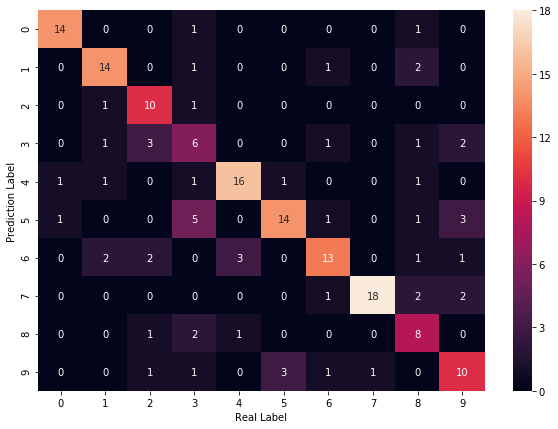

In [132]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [128]:
n_T = 0
for i in range(180):
    if list_P[i] == digits.target[1617+i]:
        n_T += 1
print("Accuracy:{}".format(n_T/180))

Accuracy:0.6833333333333333
